### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Sorting an array using quicksort and output of some statistics

In [1]:
# main function to be called for sorting the complete array
# this code contains counters for outputting statistics
# the counters are incremented after the action to be counted happened
def sort(a, outputStats=True):
    global quicksort_calls, partition_calls, comparison_indexes, comparison_keys, exchange_keys, assignment_key, exec_for_loop
    # initialization of counters
    quicksort_calls = 0
    partition_calls = 0
    comparison_indexes = 0
    comparison_keys = 0
    exchange_keys = 0
    assignment_key = 0
    exec_for_loop = 0
        
    quicksort(a, 0, len(a)-1)
    
    if outputStats:
        # output of counters, "# ..." means "number of ..."
        print(TEXT_SPACING, "# elements in array =", len(a))
        print(TEXT_SPACING, "# calls of quicksort =", quicksort_calls)
        print(TEXT_SPACING, "# calls of partition =", partition_calls)
        print(TEXT_SPACING, "# comparisons of two indexes =", comparison_indexes)
        print(TEXT_SPACING, "# comparisons of two keys =", comparison_keys)
        print(TEXT_SPACING, "# exchanges of two keys =", exchange_keys)
        print(TEXT_SPACING, "# assignment of one key =", assignment_key)
        print(TEXT_SPACING, "# executions for-loop =", exec_for_loop)
    return a, quicksort_calls, partition_calls, comparison_indexes, comparison_keys, exchange_keys, assignment_key, exec_for_loop

In [2]:
def quicksort(a, left, right):
    global quicksort_calls, partition_calls, comparison_indexes
    quicksort_calls += 1
    comparison_indexes += 1
    if left < right:
        pos_pivot = partition(a, left, right)
        partition_calls += 1
        quicksort(a, left, pos_pivot-1)
        quicksort(a, pos_pivot+1, right)
    return a

In [3]:
def partition(a, left, right):
    global comparison_keys, exchange_keys, assignment_key, exec_for_loop
    # pivot element is the element at right side of part to be sorted
    pivot = a[right]
    assignment_key += 1
    i = left-1
    for j in range(left, right):
        exec_for_loop += 1
        comparison_keys += 1
        if a[j] <= pivot:
            i = i+1
            a[i], a[j] = a[j], a[i]
            exchange_keys += 1
    a[i+1], a[right] = a[right], a[i+1]
    exchange_keys += 1
    # return position of pivot element
    return i+1

## Global variables for easier information exchange between functions

In [4]:
quicksort_calls = 0
partition_calls = 0
comparison_keys = 0
comparison_indexes = 0
exchange_keys = 0 # two assignments
assignment_key = 0 # one assignment
exec_for_loop = 0

## Constants

In [5]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10
# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"
TEXT_SPACING = " "*len(TEXT_BEFORE_SORTING)

## Generate test data and test algorithm

In [6]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, sort(sorted_array)[0])

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                # elements in array = 10
                # calls of quicksort = 19
                # calls of partition = 9
                # comparisons of two indexes = 19
                # comparisons of two keys = 45
                # exchanges of two keys = 54
                # assignment of one key = 9
                # executions for-loop = 45
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, sort(reverse_sorted_array)[0])

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
                # elements in array = 10
                # calls of quicksort = 19
                # calls of partition = 9
                # comparisons of two indexes = 19
                # comparisons of two keys = 45
                # exchanges of two keys = 29
                # assignment of one key = 9
                # executions for-loop = 45
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array)[0])

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
                # elements in array = 10
                # calls of quicksort = 15
                # calls of partition = 7
                # comparisons of two indexes = 15
                # comparisons of two keys = 23
                # exchanges of two keys = 15
                # assignment of one key = 7
                # executions for-loop = 23
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# your test here ...
array = [1,3,2]
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array)[0])

Before sorting: [1, 3, 2]
                # elements in array = 3
                # calls of quicksort = 3
                # calls of partition = 1
                # comparisons of two indexes = 3
                # comparisons of two keys = 2
                # exchanges of two keys = 2
                # assignment of one key = 1
                # executions for-loop = 2
After  sorting: [1, 2, 3]


In [10]:
# ... and here ...


## Output of statistics to understand the behavior of algorithm

In [11]:
# for visualization we make use of pyplot
import matplotlib.pyplot as plt
# used for comparison
import math

## Constants

In [12]:
# The values of the array sizes in tests can be changed here
ARRAY_SIZES = list(range(10,201,10))
FACTOR_COMPARISON = 1000

## Plot the number of executions of for loop and compare it with other behaviors

In [13]:
def plot_results(results):
    plt.figure(figsize=(15, 8))
    # create plot of number of elements and number of executions of for-loop (blue)
    plt.plot([len(r[0]) for r in results],[r[7] for r in results], "bo-")
    # compare to n * log(n) (green) and n^2 (red) behavior
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[7]/(len(r[0])*math.log(len(r[0]),2)) for r in results], "go-")
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[7]/(len(r[0])*len(r[0])) for r in results], "ro-")
    plt.xticks(ARRAY_SIZES)
    plt.grid(True)
    plt.show()

## Tests

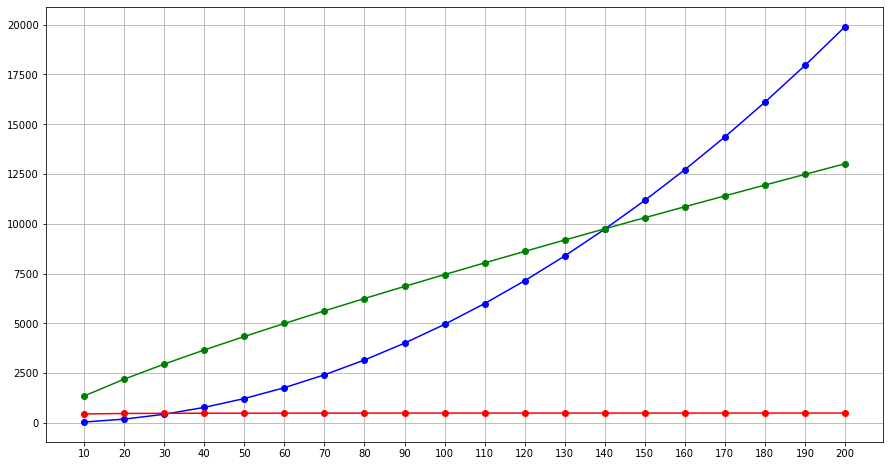

In [14]:
# test sorting sorted arrays
results = []
for i in ARRAY_SIZES:
    sorted_array = list(range(i))
    results.append(sort(sorted_array, outputStats=False))
plot_results(results)

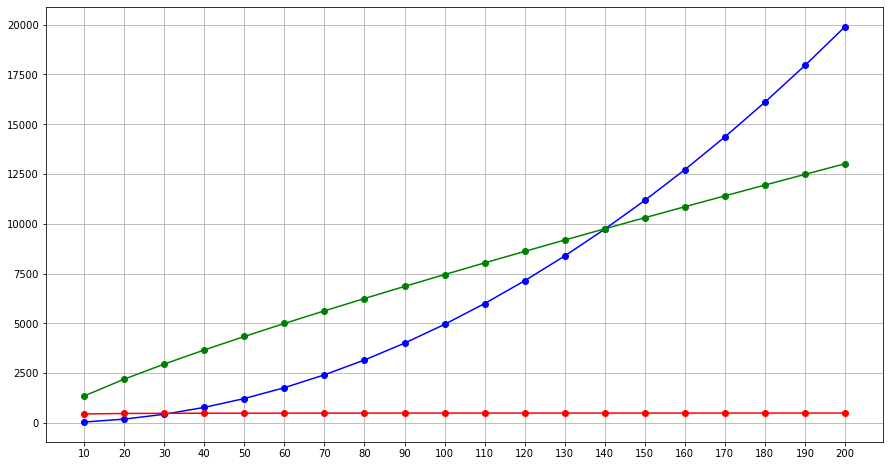

In [15]:
# test sorting reversly sorted arrays
results = []
for i in ARRAY_SIZES:
    reverse_sorted_array = list(range(i))
    results.append(sort(reverse_sorted_array, outputStats=False))
plot_results(results)

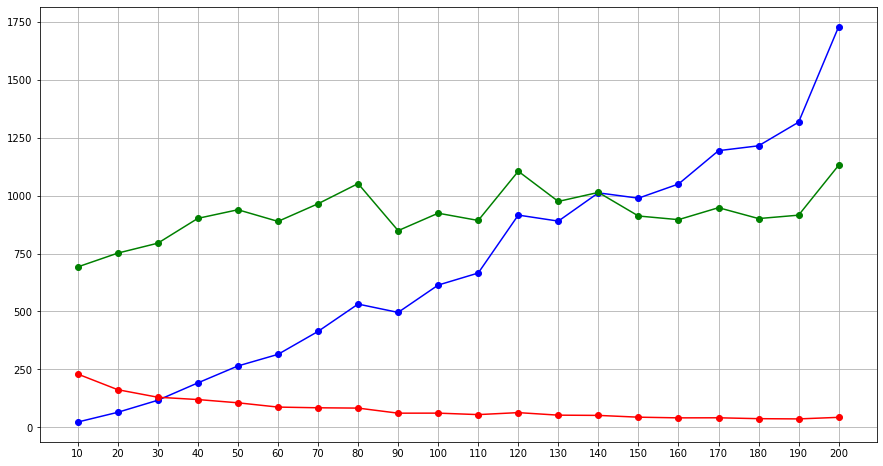

In [16]:
# test sorting random arrays
results = []
for i in ARRAY_SIZES:
    array = list(numpy.random.permutation(i))
    results.append(sort(array, outputStats=False))
plot_results(results)

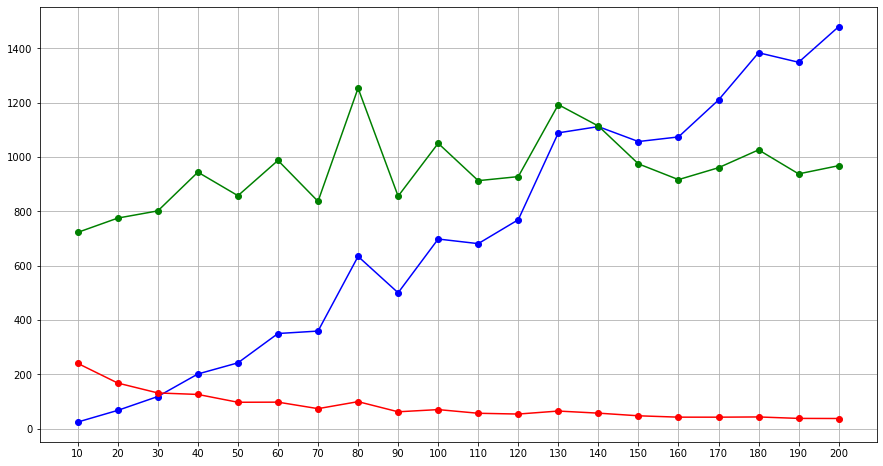

In [17]:
# test sorting random arrays
# perform several tests per array size and take the average value of the number of executions of for-loop
NUMBER_TESTS_PER_ARRAY_SIZE = 100
results = []
for i in ARRAY_SIZES:
    for j in range(NUMBER_TESTS_PER_ARRAY_SIZE):
        intermediate_results = []
        array = list(numpy.random.permutation(i))
        intermediate_results.append(sort(array, outputStats=False))
    # calculate average and store it for output
    average = sum([res[7] for res in intermediate_results]) / len(intermediate_results)
    # prepare it such existing plot function can be used
    results.append((intermediate_results[0][0],0,0,0,0,0,0,average))
plot_results(results)